## Final Project Submission

Please fill out:
* Student name: Mary Njeri Kamithi
* Student pace: self paced / part time / full time : Full Time Remote (DSFT13)
* Scheduled project review date/time: 29/6/2025
* Instructor name: William Okomba
* Blog post URL:




#Aviation Accident Risk Analysis




#Introduction



In [16]:
'''
Welcome to my aviation accident analysis project!

In this project, I analyzed aviation accident data from the National Transportation Safety Board (NTSB) to help a company decide which types of aircraft might be the safest investment as they enter the aviation industry.
The dataset includes accidents from 1962 to 2022, with information about flight phases, aircraft damage, fatalities, and more.

My goal was to clean and explore the data to find patterns in aviation accidents and identify which aircraft characteristics are linked to higher or lower risk.
I created visualizations and summarized the most important findings to support business decisions and reduce potential risks when purchasing aircraft.


'''

'\nWelcome to my aviation accident analysis project!\n\nIn this project, I analyzed aviation accident data from the National Transportation Safety Board (NTSB) to help a company decide which types of aircraft might be the safest investment as they enter the aviation industry.\nThe dataset includes accidents from 1962 to 2022, with information about flight phases, aircraft damage, fatalities, and more.\n\nMy goal was to clean and explore the data to find patterns in aviation accidents and identify which aircraft characteristics are linked to higher or lower risk.\nI created visualizations and summarized the most important findings to support business decisions and reduce potential risks when purchasing aircraft.\n\n\n'

#Data Preparation

In [17]:
#All neccessary imports
import pandas as pd
import numpy
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
#Loading the dataset
df = pd.read_csv('.\data\Aviation_Data.csv', encoding='latin1')


c:\Users\maryk\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [19]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [20]:
df.shape

(90348, 31)

In [21]:
for column in df:
  unique_values = df[column].unique()
  print(f"Unique values in column '{column}','\n': {unique_values}",'\n')

Unique values in column 'Event.Id','
': ['20001218X45444' '20001218X45447' '20061025X01555' ... '20221227106497'
 '20221227106498' '20221230106513'] 

Unique values in column 'Investigation.Type','
': ['Accident' 'Incident' '25-09-2020' '14-06-2021' '03-11-2020' '24-02-2021'
 '02-02-2021' '05-05-2021' '03-12-2020' '07-12-2020' '06-05-2021'
 '19-11-2020' '04-08-2021' '13-09-2021' '10-06-2021' '14-12-2021'
 '08-06-2021' '24-06-2021' '24-08-2021' '31-03-2021' '27-05-2021'
 '20-05-2021' '18-11-2020' '25-05-2021' '01-06-2021' '15-07-2021'
 '15-10-2021' '26-09-2020' '03-06-2021' '29-09-2021' '28-01-2021'
 '20-10-2021' '11-12-2020' '11-02-2021' '13-12-2021' '06-01-2021'
 '31-08-2021' '04-03-2021' '05-04-2021' '26-01-2021' '29-01-2021'
 '26-08-2021' '08-11-2021' '20-08-2021' '05-01-2021' '22-09-2021'
 '20-09-2021' '16-07-2021' '19-10-2021' '16-11-2021' '17-12-2021'
 '14-06-2022' '22-06-2022' '13-10-2022' '03-11-2022' '13-07-2022'
 '05-07-2022' '01-09-2022' '12-08-2022' '08-09-2022' '22-09-2022

In [22]:
df.isnull().sum()

Event.Id                   1459
Investigation.Type            0
Accident.Number            1459
Event.Date                 1459
Location                   1511
Country                    1685
Latitude                  55966
Longitude                 55975
Airport.Code              40099
Airport.Name              37558
Injury.Severity            2459
Aircraft.damage            4653
Aircraft.Category         58061
Registration.Number        2776
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8536
FAR.Description           58325
Schedule                  77766
Purpose.of.flight          7651
Air.carrier               73700
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
Broad.phase.of.flight     28624
Report.Status              7840
Publication.Date          16689
dtype: i

In [23]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [24]:
df.dtypes

Event.Id                   object
Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Latitude                   object
Longitude                  object
Airport.Code               object
Airport.Name               object
Injury.Severity            object
Aircraft.damage            object
Aircraft.Category          object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
FAR.Description            object
Schedule                   object
Purpose.of.flight          object
Air.carrier                object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.phase.of.flight      object
Report.Status 

Handling null values

In [25]:
#handling the columns with too many null values
high_null_cols = ['Latitude','Longitude','Aircraft.Category','FAR.Description','Schedule','Air.carrier']
df.drop(columns = high_null_cols, inplace =True)

In [26]:
#Filling numeric cols with 0
num_cols = ['Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries','Total.Uninjured']
df[num_cols] = df[num_cols].fillna(0)

In [27]:
#Filling categorical cols with 'Unknown'
cat_cols =[ 'Location', 'Country', 'Airport.Code', 'Airport.Name','Injury.Severity', 'Aircraft.damage', 'Registration.Number','Make', 'Model', 'Amateur.Built', 'Engine.Type','Purpose.of.flight', 'Weather.Condition', 'Broad.phase.of.flight','Report.Status']
df[cat_cols] = df[cat_cols].fillna('Unknown')

In [28]:
#Converting dates and handling null vals
df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors = 'coerce')
df['Publication.Date'] = pd.to_datetime(df['Publication.Date'], errors = 'coerce')



In [29]:
#Rechecking missing vals
df.isnull().sum()

Event.Id                   1459
Investigation.Type            0
Accident.Number            1459
Event.Date                 1459
Location                      0
Country                       0
Airport.Code                  0
Airport.Name                  0
Injury.Severity               0
Aircraft.damage               0
Registration.Number           0
Make                          0
Model                         0
Amateur.Built                 0
Number.of.Engines          7543
Engine.Type                   0
Purpose.of.flight             0
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition             0
Broad.phase.of.flight         0
Report.Status                 0
Publication.Date          16689
dtype: int64

In [30]:
#Handling the remaining columns that have null values
# Fill with median
df['Number.of.Engines'] = df['Number.of.Engines'].fillna(df['Number.of.Engines'].median())

#Handling publication date
df.drop(columns=['Publication.Date'], inplace=True)


In [31]:
df.isnull().sum().sum()

4377

# **EXPLORATORY DATA ANALYSIS (EDA)**

Univariate Analysis

In [32]:
#Numerical cols
numerical_cols = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured', 'Number.of.Engines']
df[numerical_cols].describe()

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Number.of.Engines
count,90348.000000,90348.000000,90348.000000,90348.000000,90348.000000
mean,0.555640,0.236607,0.304135,4.890966,1.134347
std,5.085584,1.423306,2.067189,26.790427,0.429384
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,1.000000,1.000000
75%,0.000000,0.000000,0.000000,2.000000,1.000000
max,349.000000,161.000000,380.000000,699.000000,8.000000


In [33]:
# Convert to numeric in case there are non-numeric entries
df[numerical_cols] = df[numerical_cols].apply(pd.to_numeric, errors='coerce')

# Display summary statistics
summary = df[numerical_cols].describe().T[['min', 'max', 'mean', '50%', 'std']]
summary.rename(columns={'50%': 'median'}, inplace=True)
print(summary)

                        min    max      mean  median        std
Total.Fatal.Injuries    0.0  349.0  0.555640     0.0   5.085584
Total.Serious.Injuries  0.0  161.0  0.236607     0.0   1.423306
Total.Minor.Injuries    0.0  380.0  0.304135     0.0   2.067189
Total.Uninjured         0.0  699.0  4.890966     1.0  26.790427
Number.of.Engines       0.0    8.0  1.134347     1.0   0.429384


In [34]:
#Analysis of the model with the no of incidents
df['Model'].value_counts().head(10) # Check the top 10 models with the most accidents and incidents
df['Model'].value_counts().tail(10)

DH-100 MK.6            1
767-251                1
BD12                   1
SA-3B                  1
SU-26M                 1
XPA-18                 1
PA 18-105 SPECIAL      1
KOLB TWINSTAR MK II    1
7GCA                   1
QUICKSILVER MXLII      1
Name: Model, dtype: int64

In [35]:
# Take the year from the 'Event.Date' column and create a new 'Year' column
df['Year'] = pd.to_datetime(df['Event.Date'], errors='coerce').dt.year

# Total fatalities and injuries by year
df['Year'].value_counts().head(10) # Check the top 10 years with the most accidents and incidents
df['Year'].value_counts().tail(10) # Check the bottom 10 years with the most accidents and incidents

2013.0    1561
2021.0    1545
2014.0    1535
2020.0    1392
1979.0       2
1981.0       1
1977.0       1
1974.0       1
1962.0       1
1948.0       1
Name: Year, dtype: int64

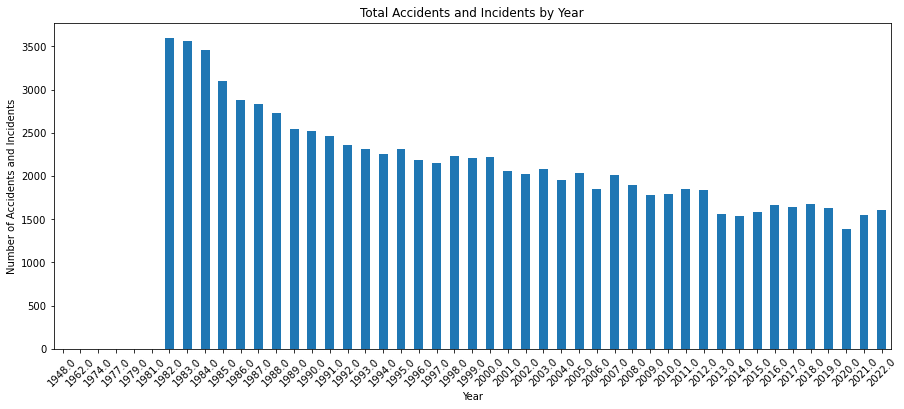

In [36]:
#Total accidents and incidents by year
df['Year'].value_counts().sort_index().plot(kind='bar', figsize=(15, 6))
plt.title('Total Accidents and Incidents by Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents and Incidents')
plt.xticks(rotation=45)
plt.show()

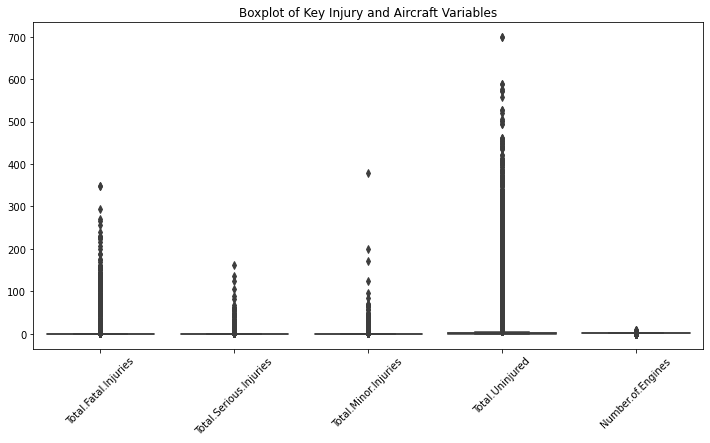

In [37]:
#boxplot of key injury and aircraft variables
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Total.Fatal.Injuries', 'Total.Serious.Injuries',
                     'Total.Minor.Injuries', 'Total.Uninjured',
                     'Number.of.Engines']])
plt.xticks(rotation=45)
plt.title('Boxplot of Key Injury and Aircraft Variables')
plt.show()

In [38]:
#Handling skewed data
df['Total.Serious.Injuries'] = pd.to_numeric(df['Total.Serious.Injuries'], errors='coerce')
df['Total.Serious.Injuries'].fillna(0, inplace=True)

In [39]:
#zero counts and skewness
for col in numerical_cols:
    zero_count = (df[col] == 0).sum()
    skew = df[col].skew()
    print(f"{col}: Zeros = {zero_count}, Skewness = {skew:.2f}")

Total.Fatal.Injuries: Zeros = 72535, Skewness = 35.60
Total.Serious.Injuries: Zeros = 77258, Skewness = 53.41
Total.Minor.Injuries: Zeros = 74846, Skewness = 94.10
Total.Uninjured: Zeros = 37250, Skewness = 9.49
Number.of.Engines: Zeros = 1226, Skewness = 2.74


Bivariate Aanalysis

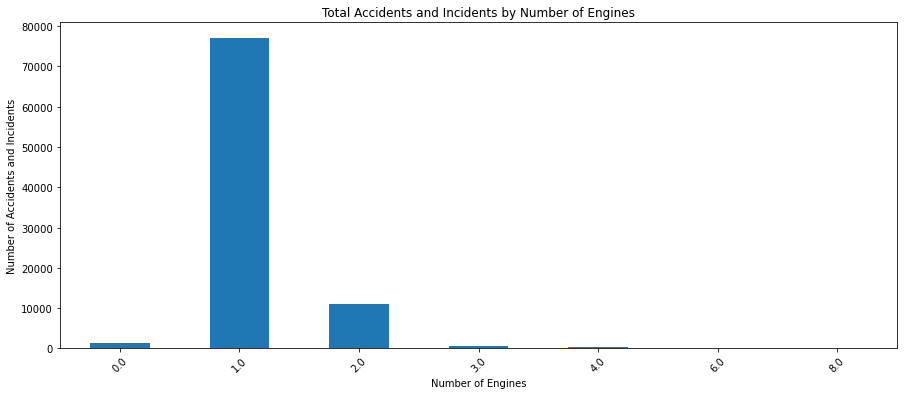

In [40]:
# Total accidents by engine type and number of engines
df['Engine.Type'].value_counts().head(10) # Check the top 10 engine types with the most accidents and incidents
df['Number.of.Engines'].value_counts().head(10) # Check the top 10 engine counts with the most accidents and incidents
df['Number.of.Engines'].value_counts().tail(10) # Check the bottom 10 engine counts with the most accidents and incidents
df['Number.of.Engines'].value_counts().sort_index().plot(kind='bar', figsize=(15, 6))
plt.title('Total Accidents and Incidents by Number of Engines')
plt.xlabel('Number of Engines')
plt.ylabel('Number of Accidents and Incidents')
plt.xticks(rotation=45)
plt.show()



weather conditions which cause the most incidences

In [41]:
#Weather conditions analysis
df['Weather.Condition'].value_counts().head(10) # Check the top 10 weather conditions with the most accidents and incidents
df['Weather.Condition'].value_counts().tail(10) # Check the bottom 10 weather conditions with the most accidents and incidents

VMC        77303
IMC         5976
Unknown     5951
UNK          856
Unk          262
Name: Weather.Condition, dtype: int64

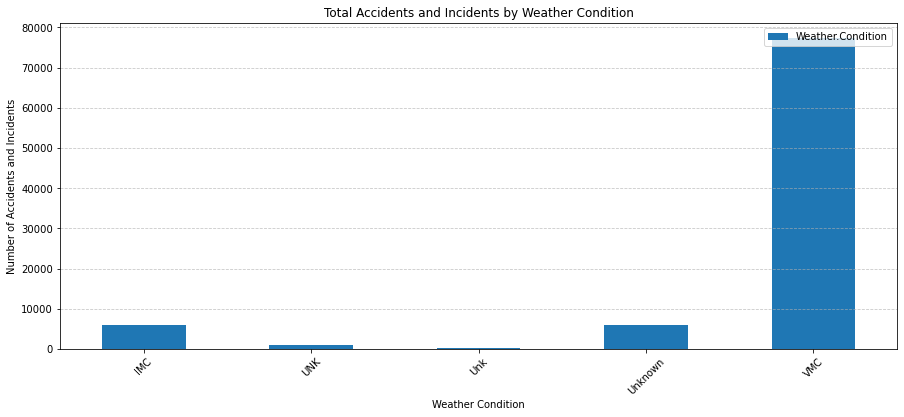

In [42]:
#Weather conditions and accidents
df['Weather.Condition'].value_counts().sort_index().plot(kind='bar', figsize=(15, 6))
plt.title('Total Accidents and Incidents by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents and Incidents')
plt.xticks(rotation=45)
plt.legend (loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

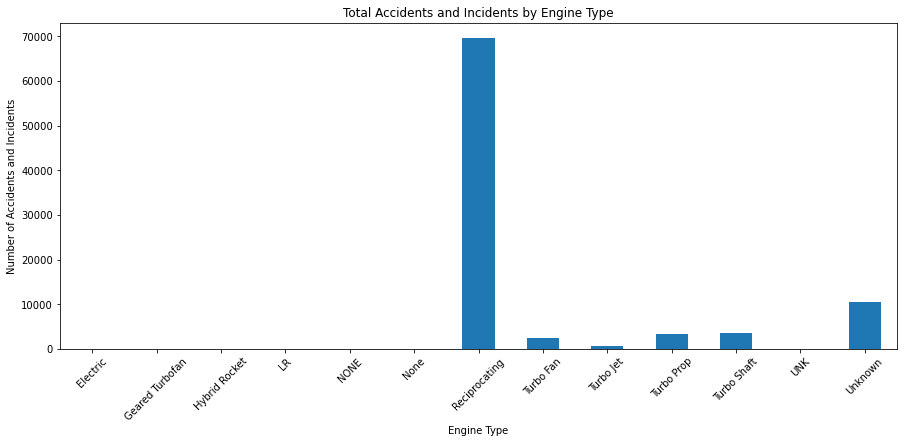

In [43]:
#Engine type and accidents
df['Engine.Type'].value_counts().sort_index().plot(kind='bar', figsize=(15, 6))
plt.title('Total Accidents and Incidents by Engine Type')
plt.xlabel('Engine Type')
plt.ylabel('Number of Accidents and Incidents')
plt.xticks(rotation=45)
plt.show()

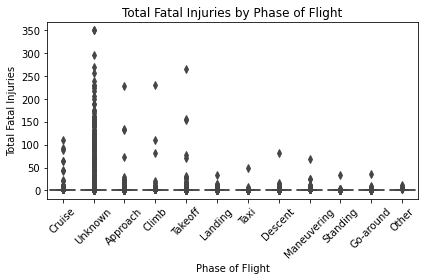

In [44]:
#categorical vs numerical
sns.boxplot(x='Broad.phase.of.flight', y='Total.Fatal.Injuries', data=df)
plt.title("Total Fatal Injuries by Phase of Flight")
plt.xlabel("Phase of Flight")
plt.ylabel("Total Fatal Injuries")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


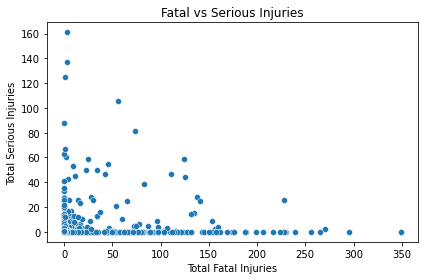

In [45]:
#umerical vs numerical
# Scatter plot between Serious and Fatal Injuries
sns.scatterplot(x='Total.Fatal.Injuries', y='Total.Serious.Injuries', data=df)
plt.title("Fatal vs Serious Injuries")
plt.xlabel("Total Fatal Injuries")
plt.ylabel("Total Serious Injuries")
plt.tight_layout()
plt.show()

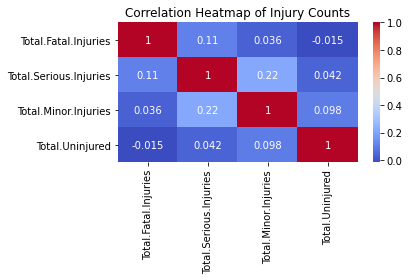

In [46]:
#correlation heatmap of injury columns
injury_cols = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']
corr = df[injury_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Injury Counts")
plt.tight_layout()
plt.show()

Mulltivariate Analysis


In [47]:
# Count the top 10 most common aircraft makes
top_10_makes = df['Make'].value_counts().nlargest(10).index

# Create a new column that groups lesser makes as 'Other'
df['Make_Grouped'] = df['Make'].apply(lambda x: x if x in top_10_makes else 'Other')

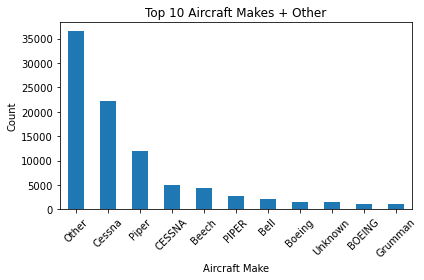

In [48]:
df['Make_Grouped'].value_counts().plot(kind='bar', title='Top 10 Aircraft Makes + Other')
plt.xlabel('Aircraft Make')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

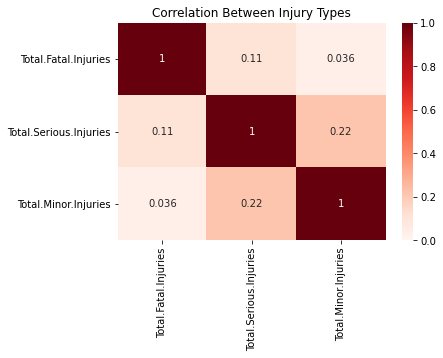

In [49]:


injury_vars = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']

# Convert to numeric in case of issues
df[injury_vars] = df[injury_vars].apply(pd.to_numeric, errors='coerce')

# Correlation matrix and heatmap
corr = df[injury_vars].corr()
sns.heatmap(corr, annot=True, cmap='Reds', vmin=0, vmax=1)
plt.title('Correlation Between Injury Types')
plt.show()

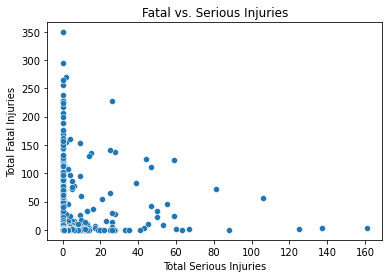

In [50]:
sns.scatterplot(data=df, x='Total.Serious.Injuries', y='Total.Fatal.Injuries')
plt.title('Fatal vs. Serious Injuries')
plt.xlabel('Total Serious Injuries')
plt.ylabel('Total Fatal Injuries')
plt.show()

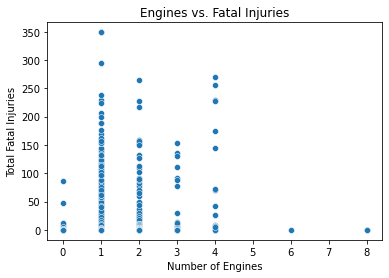

In [51]:
sns.scatterplot(data=df, x='Number.of.Engines', y='Total.Fatal.Injuries')
plt.title('Engines vs. Fatal Injuries')
plt.xlabel('Number of Engines')
plt.ylabel('Total Fatal Injuries')
plt.show()

In [52]:
# Create a binary column 'Is_Fatal'
df['Is_Fatal'] = df['Total.Fatal.Injuries'].fillna(0).apply(lambda x: 1 if x > 0 else 0)

# Optional: preview value counts to confirm
print(df['Is_Fatal'].value_counts())


0    72535
1    17813
Name: Is_Fatal, dtype: int64


In [53]:
df.groupby('Is_Fatal')[['Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']].mean()


,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
Is_Fatal,,,
0,0.228000,0.330944,5.985359
1,0.271656,0.194970,0.434570


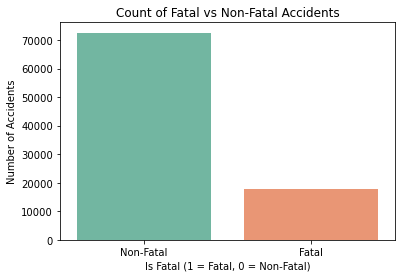

In [54]:
sns.countplot(data=df, x='Is_Fatal', palette='Set2')
plt.title('Count of Fatal vs Non-Fatal Accidents')
plt.xlabel('Is Fatal (1 = Fatal, 0 = Non-Fatal)')
plt.ylabel('Number of Accidents')
plt.xticks([0, 1], ['Non-Fatal', 'Fatal'])
plt.show()


In [55]:
df.to_csv("cleaned_aviation_data.csv", index=False)


#Conclusion

In [56]:
'''
The aviation accident dataset reveals notable trends across time, conditions, and operational contexts.
A significant concentration of reported incidents has occurred since the year 2000, which may reflect enhanced reporting practices rather than an actual rise in accident frequency.
Seasonal variation is apparent, with a slight uptick during the summer months—potentially due to increased flight activity.
While weekday patterns are relatively even, weekends show marginally fewer events.

Most records are categorized as incidents rather than full accidents, with fatal injuries comprising a minority of cases—though still posing serious implications.
Higher injury severity is clearly associated with more extensive aircraft damage, particularly in cases of destruction.
Interestingly, most accidents happened under clear weather, suggesting human or mechanical error played a greater role than environmental factors.
Crucial flight phases, especially takeoff, landing, and en route, are frequently linked to accident severity, with the en route phase associated with more fatalities.

General aviation—especially private and recreational flights—constitutes the majority of events.
Common aircraft makes such as Cessna and Piper appear frequently due to their widespread use.
Technical characteristics also matter: single-engine, reciprocating-engine aircraft feature prominently.
While weather alone may not reliably predict fatalities, its interaction with flight phase and purpose provides important context for risk analysis and safety planning.

'''


'\nThe aviation accident dataset reveals notable trends across time, conditions, and operational contexts.\nA significant concentration of reported incidents has occurred since the year 2000, which may reflect enhanced reporting practices rather than an actual rise in accident frequency.\nSeasonal variation is apparent, with a slight uptick during the summer months—potentially due to increased flight activity.\nWhile weekday patterns are relatively even, weekends show marginally fewer events.\n\nMost records are categorized as incidents rather than full accidents, with fatal injuries comprising a minority of cases—though still posing serious implications.\nHigher injury severity is clearly associated with more extensive aircraft damage, particularly in cases of destruction.\nInterestingly, most accidents happened under clear weather, suggesting human or mechanical error played a greater role than environmental factors.\nCrucial flight phases, especially takeoff, landing, and en route, 